<a href="https://colab.research.google.com/github/sriram403/MachineLearningBlogs/blob/main/Agriculture_real_world_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting kaggle to accepted by google colab

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"adithiyacommon","key":"e55771e49831824d56432d6c498eafcf"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                   Data Science Job Salaries                    7KB  2022-06-15 08:59:12          19333        601  1.0              
jpmiller/employee-attrition-for-healthcare           Employee Attrition for Healthcare           59KB  2022-08-10 22:34:29            405         27  0.9705882        
deepcontractor/mcdonalds-india-menu-nutrition-facts  McDonald's India : Menu Nutrition Dataset    5KB  2022-07-28 17:08:52           1035         75  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex      Life Expectancy in Europe by Age and Sex     4MB  2022-08-12 15:28:01            443         28  1.0       

#Getting Dataset from kaggle

In [ ]:
!kaggle datasets download -d aman2000jaiswal/agriculture-crop-images

agriculture-crop-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile 
zip = zipfile.ZipFile("/content/agriculture-crop-images.zip")
zip.extractall()
zip.close()

In [ ]:
import pandas as pd
crop_details = pd.read_csv("/content/Crop_details.csv")
crop_details[:5]

,Unnamed: 0,path,crop,croplabel
0,0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg,sugarcane,3
1,1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg,sugarcane,3
2,2,/kaggle/input/kag2/sugarcane/sugarcane032arot....,sugarcane,3
3,3,/kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg,sugarcane,3
4,4,/kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg,sugarcane,3


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
import os 
for file,classname,images in os.walk("/content/crop_images"):
  print(f"{file} {(classname)} {len(images)}")

/content/crop_images ['maize', 'jute', 'wheat', 'sugarcane', 'rice'] 0
/content/crop_images/maize [] 40
/content/crop_images/jute [] 40
/content/crop_images/wheat [] 41
/content/crop_images/sugarcane [] 40
/content/crop_images/rice [] 40


In [ ]:
class_names = os.listdir("/content/crop_images")
class_names

['maize', 'jute', 'wheat', 'sugarcane', 'rice']

In [ ]:
train_dir = "/content/kag2/"
valid_dir = "/content/crop_images"

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode="categorical",image_size=(224,224))
valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,label_mode="categorical",image_size=(224,224),shuffle=False) 

Found 804 files belonging to 5 classes.
Found 201 files belonging to 5 classes.


In [ ]:
class_names=train_data.class_names

#Base_mark

In [ ]:
base_mark = tf.keras.applications.EfficientNetB0(include_top=False)
base_mark.trainable=False

input = tf.keras.layers.Input(shape=(224,224,3))

x = base_mark(input)

pool = tf.keras.layers.GlobalAveragePooling2D()(x)

output = tf.keras.layers.Dense(len(class_names),activation="softmax")(pool)

mark = tf.keras.Model(input,output)
mark.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")
mark.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_9   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_15 (Dense)            (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
mark_history = mark.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                          validation_data=valid_data,validation_steps=int(0.15*len(valid_data)))

Epoch 1/5
26/26 [==============================] - 16s 184ms/step - loss: 1.2930 - accuracy: 0.5473 - val_loss: 0.7019 - val_accuracy: 0.9375
Epoch 2/5
26/26 [==============================] - 3s 96ms/step - loss: 0.8183 - accuracy: 0.7799 - val_loss: 0.4976 - val_accuracy: 0.9375
Epoch 3/5
26/26 [==============================] - 3s 88ms/step - loss: 0.6078 - accuracy: 0.8495 - val_loss: 0.3014 - val_accuracy: 0.9688
Epoch 4/5
26/26 [==============================] - 3s 89ms/step - loss: 0.5073 - accuracy: 0.8644 - val_loss: 0.2524 - val_accuracy: 0.9688
Epoch 5/5
26/26 [==============================] - 2s 74ms/step - loss: 0.4282 - accuracy: 0.9042 - val_loss: 0.1979 - val_accuracy: 0.9688


#history

In [ ]:
def plot_history(mark_history,new_history=None,fine=None,fine_tune_epoch=5):
  loss = mark_history.history["loss"]
  val_loss = mark_history.history["val_loss"]
  accuracy = mark_history.history["accuracy"]
  val_accuracy = mark_history.history["val_accuracy"]

  if fine:
    new_loss = loss+new_history.history["loss"]
    new_accuracy = accuracy+new_history.history["accuracy"]

    new_val_loss = val_loss + new_history.history["val_loss"]
    new_val_accuracy = val_accuracy + new_history.history["val_accuracy"]

    plt.figure(figsize=(10,7))
    plt.plot(new_loss,label="loss")
    plt.plot(new_val_loss,label="val_loss")
    plt.plot([fine_tune_epoch,fine_tune_epoch],plt.ylim(),label="after_fine_tuned")
    plt.legend()

    plt.figure(figsize=(10,7))
    plt.plot(new_accuracy,label="accuracy")
    plt.plot(new_val_accuracy,label="val_accuracy")
    plt.plot([fine_tune_epoch,fine_tune_epoch],plt.ylim(),label="after_fine_tuned")
    plt.legend()

  else:
        plt.figure(figsize=(10,7))
        plt.plot(loss,label="loss")
        plt.plot(val_loss,label="val_loss")
        plt.legend()

        plt.figure(figsize=(10,7))
        plt.plot(accuracy,label="accuracy")
        plt.plot(val_accuracy,label="val_accuracy")
        plt.legend()

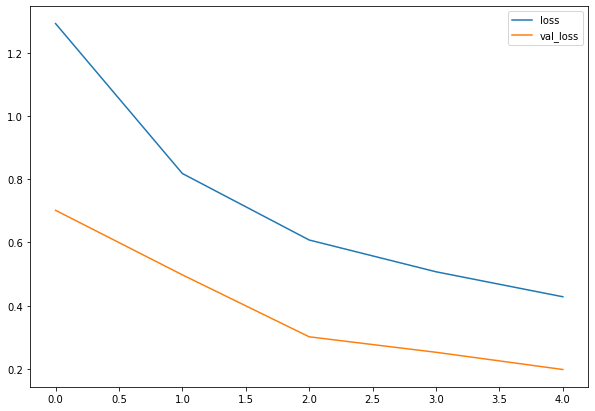

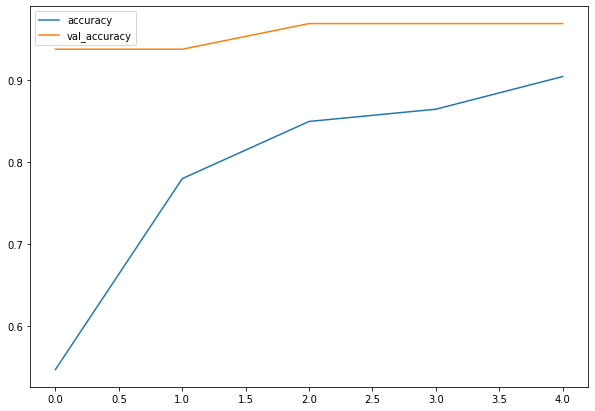

In [ ]:
plot_history(mark_history)

In [ ]:
mark.evaluate(valid_data)

7/7 [==============================] - 1s 71ms/step - loss: 0.3684 - accuracy: 0.9353


[0.3683731257915497, 0.9353233575820923]

#mark_1

In [ ]:
base_mark = tf.keras.applications.EfficientNetB0(include_top=False)
base_mark.trainable=False

input = tf.keras.layers.Input(shape=(224,224,3))

x = base_mark(input)

pool = tf.keras.layers.GlobalAveragePooling2D()(x)

dense_layer = tf.keras.layers.Dense(500,activation="relu")(pool)

output = tf.keras.layers.Dense(len(class_names),activation="softmax")(dense_layer)

mark_1 = tf.keras.Model(input,output)
mark_1.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")
mark_1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_10  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_16 (Dense)            (None, 500)               640500    
                                                                 
 dense_17 (Dense)            (None, 5)                 2505      
                                                                 
Total params: 4,692,576
Trainable params: 643,005
Non-trainable params: 4,049,571
___________________________________________

In [ ]:
mark_1_history = mark_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                          validation_data=valid_data,validation_steps=int(0.15*len(valid_data)))

Epoch 1/5
26/26 [==============================] - 9s 126ms/step - loss: 0.6808 - accuracy: 0.7450 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 2s 74ms/step - loss: 0.1764 - accuracy: 0.9527 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 3/5
26/26 [==============================] - 2s 74ms/step - loss: 0.0707 - accuracy: 0.9888 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 2s 74ms/step - loss: 0.0378 - accuracy: 0.9963 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/5
26/26 [==============================] - 2s 75ms/step - loss: 0.0345 - accuracy: 0.9950 - val_loss: 0.0010 - val_accuracy: 1.0000


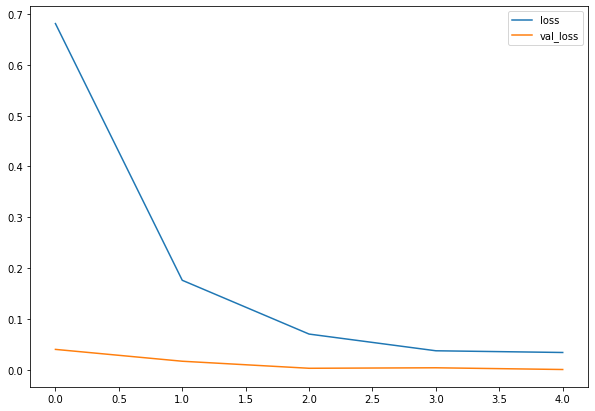

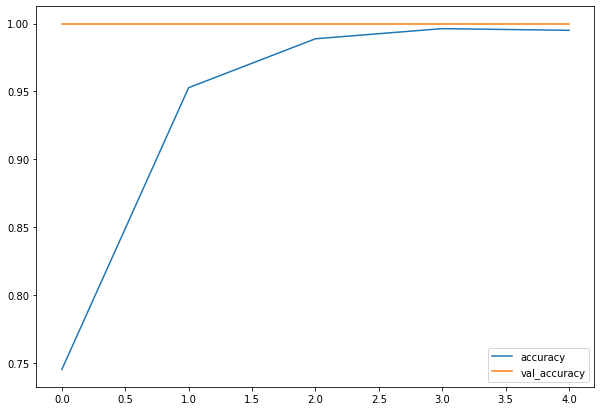

In [ ]:
plot_history(mark_1_history)

In [ ]:
mark_1.evaluate(valid_data)

7/7 [==============================] - 1s 70ms/step - loss: 0.0116 - accuracy: 1.0000


[0.0115810576826334, 1.0]

#confusion_matrix

In [ ]:
class_names

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

In [ ]:
pred = mark_1.predict(valid_data)
pred

array([[9.9812931e-01, 1.5091062e-04, 4.5985132e-04, 1.2393260e-03,
        2.0686244e-05],
       [9.9888891e-01, 2.8247826e-04, 7.6658194e-05, 7.4964185e-04,
        2.3823920e-06],
       [9.9946493e-01, 3.4044906e-06, 1.2420942e-05, 5.1523803e-04,
        3.9752417e-06],
       ...,
       [1.5017256e-02, 1.1912652e-03, 4.2947933e-02, 2.6044089e-04,
        9.4058305e-01],
       [5.5698998e-04, 1.3569638e-03, 4.7936277e-03, 3.5387562e-03,
        9.8975372e-01],
       [4.2703373e-06, 1.3302780e-02, 6.4582802e-02, 2.1615895e-04,
        9.2189395e-01]], dtype=float32)

In [ ]:
y_pred = pred.argmax(axis=1)
y_labels = []
for image,label in valid_data.unbatch():
  y_labels.append(label.numpy().argmax())

In [ ]:
base_pred = mark.predict(valid_data)
base_pred_label = base_pred.argmax(axis=1)

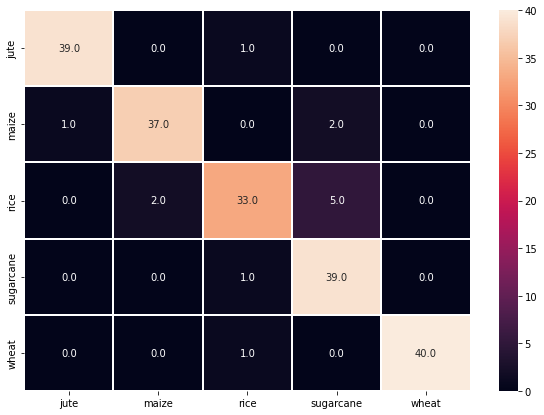

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
c_m = confusion_matrix(y_labels,base_pred_label)
import seaborn as sb 
plt.figure(figsize=(10,7))
sb.heatmap(c_m,annot=True,fmt=".1f",linewidths=1,xticklabels=[i for i in class_names],yticklabels=[i for i in class_names])

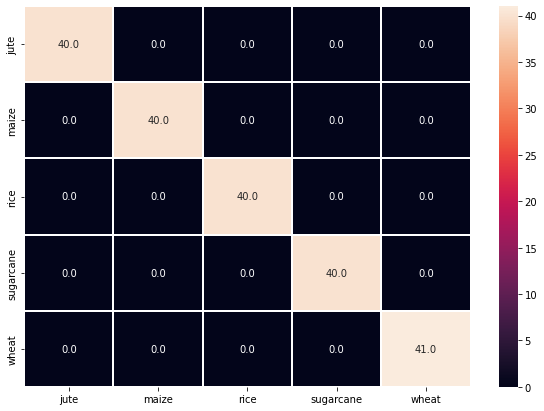

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
c_m = confusion_matrix(y_labels,y_pred)
import seaborn as sb 
plt.figure(figsize=(10,7))
sb.heatmap(c_m,annot=True,fmt=".1f",linewidths=1,xticklabels=[i for i in class_names],yticklabels=[i for i in class_names])

In [ ]:
c_r_dict = classification_report(y_labels,y_pred,output_dict=True)
c_r_dict

{'0': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 40},
 '1': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 40},
 '2': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 40},
 '3': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 40},
 '4': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 41},
 'accuracy': 1.0,
 'macro avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 201},
 'weighted avg': {'f1-score': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'support': 201}}

In [ ]:
def pred_image(path,mark):
  img_path = tf.io.read_file(path)
  img_data = tf.io.decode_image(img_path)
  img_size = tf.image.resize(img_data,size=(224,224))

  pred = mark.predict(tf.expand_dims(img_size,axis=0))

  pred_label = pred.argmax()
  # print(pred.argmax(axis=1))
  # print(pred)

  pred_class = class_names[pred_label]

  pred_prob = tf.reduce_max(pred)
  plt.figure(figsize=(10,7))
  plt.imshow(img_data)
  plt.title(f"the prediction is {pred_class} and i'm sure of {pred_prob*100:.2f}%")
  plt.axis(False)

In [ ]:
def predicting_images(dir,img_to_view,mark):
  import random
  for i in range(img_to_view):
    selected_image = random.sample(os.listdir(dir),1)
    path = dir+"/"+selected_image[0]
    pred_image(path,mark)
    plt.axis(False)

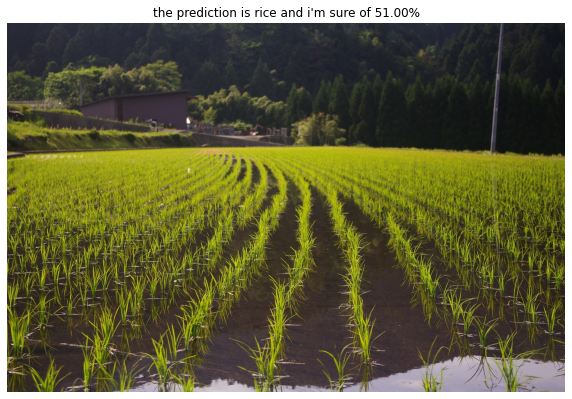

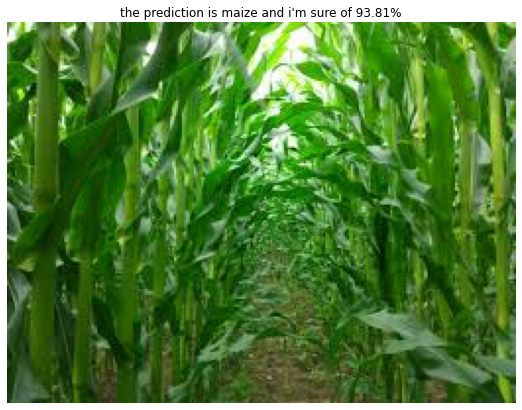

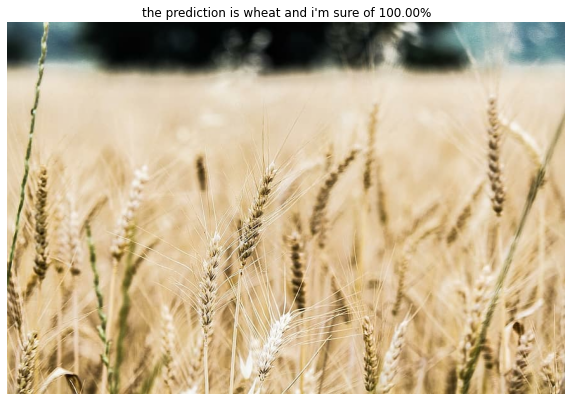

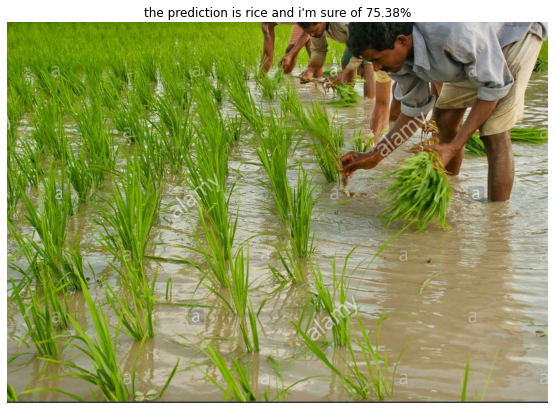

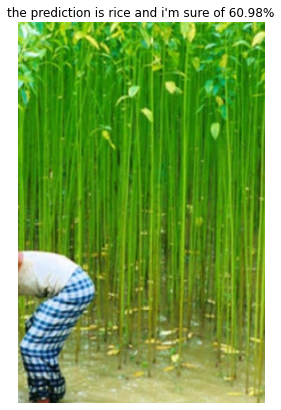

In [ ]:
predicting_images("/content/test_crop_image",img_to_view=5,mark=mark_1)

In [ ]:
# import joblib

In [ ]:
# import pickle 
# dir = "mark_1_file.pkl"
# joblib.dump(mark_1,dir)

['mark_1_file.pkl']

In [ ]:
pickle.dump(mark_1,open("mark_1.pkl","wb"))

# End :)